In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 16,8

In [ ]:
df = pd.read_csv('HR.csv')

In [58]:
# pd.set_option('max_colwidth', 50)
# pd.set_option('display.width', 80)
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
df.sort_values('salary', ascending=False)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
7499,0.93,0.58,5,238,2,0,0,0,sales,medium
3841,0.76,0.61,3,141,2,0,0,0,sales,medium
5714,0.54,0.82,4,266,2,0,0,0,IT,medium
11360,0.62,0.75,5,165,4,0,0,0,sales,medium
11361,0.87,0.48,5,242,3,0,0,0,sales,medium
...,...,...,...,...,...,...,...,...,...,...
5865,0.17,0.91,6,246,5,0,0,0,IT,high
12618,0.45,0.57,2,148,3,0,1,0,marketing,high
7572,0.62,0.76,4,163,3,0,0,0,sales,high
10245,0.79,0.56,4,177,3,0,0,0,sales,high


### Задание 2. `Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).`

In [89]:
for column in df.columns:
    if ( str( type(df.loc[:,column][0]) ).find('numpy') == -1 ) :continue
    print(column)
    print('-'*55 )
    arr = np.array(df.loc[:,column])
    mean_ = arr.mean()
    median_ = np.median(arr)
    mode_ = stats.mode(arr )[0] 
    min_ = np.min( arr )
    max_ = np.max( arr )
    std_ = np.std( arr, ddof = 1 )
    q1 = np.quantile( arr, 0.25)
    q3 = np.quantile( arr, 0.75)
    iqr = 1.5*(q3-q1)
    
    print(f''' \tсредняя = {mean_:.2f}, медиана (2ая квантиль) = {median_:.2f}, 1ая мода = {mode_},
        минимум = {min_:.2f}, максимум = {max_:.2f}, стандартное отклонение (сигма) = {std_:.2f},
        0.25_кванитиль = {q1:.2f}, 0.75_кванитиль = {q3:.2f}, межквантильный размах (IQR) = {iqr:.2f}\n''' )
del arr, mean_ ,median_ , mode_ , min_ , max_ , std_ , q1, q3 , iqr # Бережем память #RAM-friendly
    #break

satisfaction_level
-------------------------------------------------------
 	средняя = 0.61, медиана (2ая квантиль) = 0.64, 1ая мода = [0.1],
        минимум = 0.09, максимум = 1.00, стандартное отклонение (сигма) = 0.25,
        0.25_кванитиль = 0.44, 0.75_кванитиль = 0.82, межквантильный размах (IQR) = 0.57

last_evaluation
-------------------------------------------------------
 	средняя = 0.72, медиана (2ая квантиль) = 0.72, 1ая мода = [0.55],
        минимум = 0.36, максимум = 1.00, стандартное отклонение (сигма) = 0.17,
        0.25_кванитиль = 0.56, 0.75_кванитиль = 0.87, межквантильный размах (IQR) = 0.46

number_project
-------------------------------------------------------
 	средняя = 3.80, медиана (2ая квантиль) = 4.00, 1ая мода = [4],
        минимум = 2.00, максимум = 7.00, стандартное отклонение (сигма) = 1.23,
        0.25_кванитиль = 3.00, 0.75_кванитиль = 5.00, межквантильный размах (IQR) = 3.00

average_montly_hours
---------------------------------------------------

Выводы:
- За последние 5 лет повышали в среднем 2% сотрудников, не удивительно, почему так много ушедших - 24% и среди 68% всех сотрудников ушли из компании от 0% до 67% (0.24 +- 1 сигма)
- в среднем 68% сотрудников проводят в копании от 2 до 5 лет, а больше 5.5 лет считается выбросом (то есть если ты в компании более 5.5лет это уникально)
- В среднем из 68% сотрудников шанс несчастного случая 0 - 50% с средним 14%( средняя 0.14 +- 1сигма 0.35), что довольно много
- в среднем 68% сотрудников проводят от 150 до 250 часов за рабочим местом, при том что первая мода - 135 - что говорит что кто то ходит на работу как надо, а сильно выраженная группа серьезно халтурит (с дисциплиной там не все в порядке).
- в среднем 68% сотрудников выполнили от 2 до 5 проектов
- последняя проверка у 68% сотрудников была 7- 9 месяцев назад (от 0.6 до 0.8 года)
- уровень удовлетворенности работой  у 68% сотрудников от 35% до 85% с медианой 10%, то есть есть сильное расслоение кому работа не нравится и кому нравится.

PS. на данный момент допустили, что все распределения нормальные.. (хотя по модам не попадающим в доверительный интервал уже подозрительно)

### Задание 3. `Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.Определите две самые скоррелированные и две наименее скоррелированные переменные.`

In [105]:
correlation_array = np.array( df.corr() )
columns_array = list(df.columns)

#min
min_ = np.min(correlation_array)
index_min = np.argwhere(correlation_array==min_)[0]
print('Максимальная обратная корреляция:')
print('-'*75)
print(f'\t Между переменными "{columns_array[index_min[0]]}" и "{columns_array[index_min[1]]}" \n')

#no correlation 
## для этого возведем все значения в квадрат(чтобы убрать минусы) и найдем минимум, то есть значение максимально близкое к 0
min_ = np.min(correlation_array**2)
index_min = np.argwhere(correlation_array**2==min_)[0]
print('Вообще нет корреляции:')
print('-'*75)
print(f'\t Между переменными "{columns_array[index_min[0]]}" и "{columns_array[index_min[1]]}" \n')


#max
np.place(correlation_array, correlation_array == 1, 0) # для нахождения максимума уберем все 1 (корреляция самой с собой)
max_ = np.max(correlation_array)
index_max = np.argwhere(correlation_array==max_)[0]

print('Максимальная корреляция:')
print('-'*75)
print(f'\t Между переменными "{columns_array[index_max[0]]}" и "{columns_array[index_max[1]]}"')

del correlation_array, index_max, index_min, columns_array, min_, max_ #be RAM-friendly

Максимальная обратная корреляция:
---------------------------------------------------------------------------
	 Между переменными "satisfaction_level" и "left" 

Вообще нет корреляции:
---------------------------------------------------------------------------
	 Между переменными "time_spend_company" и "Work_accident" 

Максимальная корреляция:
---------------------------------------------------------------------------
	 Между переменными "number_project" и "average_montly_hours"


Выводы логичны:
- если у сотрудника "Уровень удовлетворенности работой низкий", то он уволиться хочет 
- если сотрудник выполнил много проектов, то скорее всего он проводит много времени на работе

<AxesSubplot:>

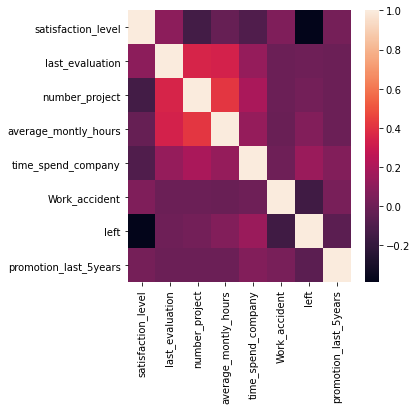

In [69]:
# Визуализируем
fig =plt.figure(figsize=(5,5))
sns.heatmap(df.corr())

Есть еще два логичных претендента на обратную корреляцию это:  `satisfaction_level` и `number_project` | `left` и `Work_accident`

### Задание 4. `Рассчитайте сколько сотрудников работает в каждом департаменте.`

In [127]:
employee_count = df.groupby('department').satisfaction_level.count().reset_index()
employee_count.columns = ['department', 'Employee_number']
employee_count.sort_values('Employee_number', ascending = False)

,department,Employee_number
7,sales,4140
9,technical,2720
8,support,2229
0,IT,1227
6,product_mng,902
5,marketing,858
1,RandD,787
2,accounting,767
3,hr,739
4,management,630


In [128]:
del employee_count #менее RAM-friendly (DataFrame из памяти не удаляется)

### Задание 5. `Показать распределение сотрудников по зарплатам`

In [124]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [131]:
employee_salary_count = df.groupby('salary').satisfaction_level.count().reset_index()
employee_salary_count.columns = ['salary', 'Employee_number']
employee_salary_count.sort_values('Employee_number', ascending = True)

,salary,Employee_number
0,high,1237
2,medium,6446
1,low,7316


In [132]:
del employee_salary_count #менее RAM-friendly (DataFrame из памяти не удаляется)

### Задание 6. `Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности`

In [141]:
employee_department_salary_count = df.groupby(['department','salary']).satisfaction_level.count().reset_index()
employee_department_salary_count.columns  = ['department', 'salary', 'Employee_number']
#визуализируем
employee_department_salary_count.style.background_gradient(cmap='Blues', axis=0)

,department,salary,Employee_number
0,IT,high,83
1,IT,low,609
2,IT,medium,535
3,RandD,high,51
4,RandD,low,364
5,RandD,medium,372
6,accounting,high,74
7,accounting,low,358
8,accounting,medium,335
9,hr,high,45


In [146]:
#визуализируем
employee_department_salary_count.style.bar(subset=['Employee_number'],color=['red', 'yellowgreen'])

,department,salary,Employee_number
0,IT,high,83
1,IT,low,609
2,IT,medium,535
3,RandD,high,51
4,RandD,low,364
5,RandD,medium,372
6,accounting,high,74
7,accounting,low,358
8,accounting,medium,335
9,hr,high,45


<AxesSubplot:xlabel='department', ylabel='Employee_number'>

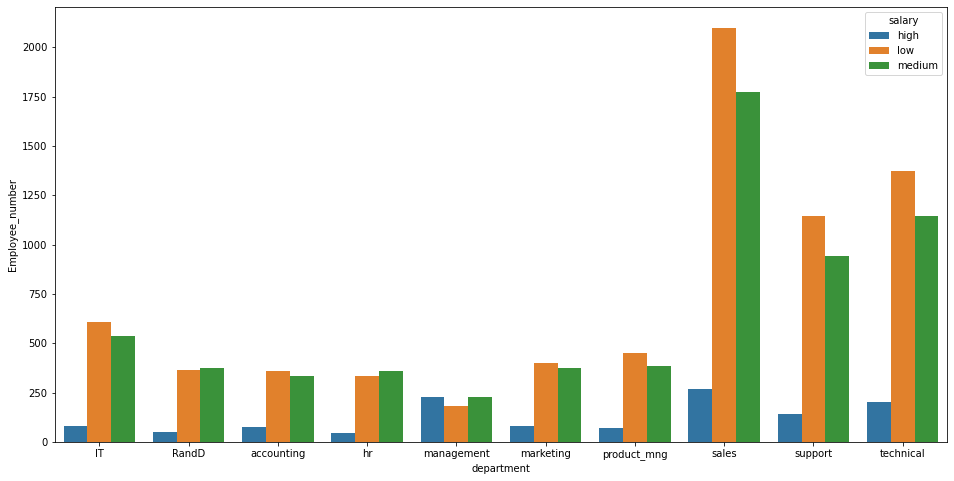

In [151]:
sns.barplot(y = 'Employee_number',x='department',hue='salary', data=employee_department_salary_count)

In [152]:
del employee_department_salary_count #менее RAM-friendly (DataFrame из памяти не удаляется)

### Задание 7. `Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом`

По сути, нужно доказать, принадлежат ли выборки к одной ГС. 
- Если да -> разницы нет
- Если нет -> Сравнить средние

In [179]:
employees_salary_high = np.array(df.loc[df.salary.str.contains('high'),'average_montly_hours'])
employees_salary_low = np.array(df.loc[df.salary.str.contains('low'),'average_montly_hours'])

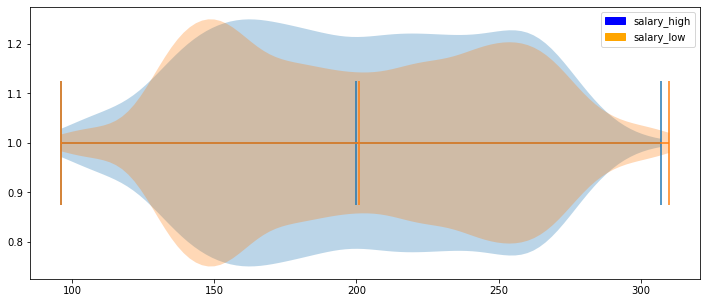

In [174]:
fig = plt.figure(figsize=(12,5))
plt.violinplot(dataset=employees_salary_high, vert=False, showmeans=True )
plt.violinplot(dataset=employees_salary_low, vert=False, showmeans=True )

import matplotlib.patches as mpatches
orange_patch = mpatches.Patch(color='orange')
blue_patch = mpatches.Patch(color='blue')
plt.legend( [blue_patch,orange_patch],['salary_high','salary_low'] );

По графику видно:   
>Распределение `salary_high`  симметричное, унимодальное,в отличие от распределения `salary_low`, для последней выражены две моды.

Проверим на нормальность (Критерий Шапиро_Уилка):

In [183]:
def array_normality_checker(array,name,confidence=0.01):
    shap = stats.shapiro(array)
    print(f' {name}  st={shap[0]:.3f}, p_val={shap[1]:.3f} ')
    print('-'*55)
    if shap[1] > confidence: print('\tРаспределение нормально') 
    else: print('\tРаспределение НЕ нормально') 

In [188]:
print('проверим на нормальность - критерий Шапиро-Уилка\n')
#Проверка на нормальность
confidence = 0.01 #1%

array_normality_checker(employees_salary_high, 'employees_salary_high',confidence = 0.01)
print()
array_normality_checker(employees_salary_low, 'employees_salary_low',confidence = 0.01)

проверим на нормальность - критерий Шапиро-Уилка

 employees_salary_high  st=0.971, p_val=0.000 
-------------------------------------------------------
	Распределение НЕ нормально

 employees_salary_low  st=0.960, p_val=0.000 
-------------------------------------------------------
	Распределение НЕ нормально


Так как оба распределения НЕ нормальны, то применять мощный т-тест мы не можем, пока не приведем распределения к нормальности.   
  
  Преобразуем все значения в выборках в логарифм от 2 и проверим на нормальность:

In [190]:
print('проверим на нормальность - критерий Шапиро-Уилка. \n Выборки преобразованы в логарифм от 2 \n')
#Проверка на нормальность
confidence = 0.01 #1%

array_normality_checker(np.log2(employees_salary_high), 'employees_salary_high',confidence = 0.01)
print()
array_normality_checker(np.log2(employees_salary_low), 'employees_salary_low',confidence = 0.01)

проверим на нормальность - критерий Шапиро-Уилка. 
 Выборки преобразованы в логарифм от 2 

 employees_salary_high  st=0.962, p_val=0.000 
-------------------------------------------------------
	Распределение НЕ нормально

 employees_salary_low  st=0.959, p_val=0.000 
-------------------------------------------------------
	Распределение НЕ нормально


Попробуем применить BoxCox: 

In [199]:
print('проверим на нормальность - критерий Шапиро-Уилка. \n Выборки преобразованы BoxCox \n')
#Проверка на нормальность
confidence = 0.01 #1%

array_normality_checker(stats.boxcox(employees_salary_high)[0], 'employees_salary_high',confidence = 0.01)
print()
array_normality_checker(stats.boxcox(employees_salary_low)[0], 'employees_salary_low',confidence = 0.01)

проверим на нормальность - критерий Шапиро-Уилка. 
 Выборки преобразованы BoxCox 

 employees_salary_high  st=0.971, p_val=0.000 
-------------------------------------------------------
	Распределение НЕ нормально

 employees_salary_low  st=0.962, p_val=0.000 
-------------------------------------------------------
	Распределение НЕ нормально


Не выходит нормализовать. Тогда применяем критерий для ненормально распределенных несвязанных выборок - критерий Манна-Уитни

In [200]:
confidence = 0.01 # 1%

st, p_val = stats.mannwhitneyu(employees_salary_high,employees_salary_low)

print(f'Stat = {st:.3f}, Критерий Уилкоксона -Манна -Уитни = {p_val:.3f}', '\n', '-'*35)

if p_val < confidence: 
    print(f'\tкритерий Уилкоксона -Манна -Уитни < {confidence} --> \n\tH0 != True: Средние распределений различаются, \n\tраспределения НЕ принадлежат одной ГС с {(1-confidence) *100:.0f} % уверенностью') 
else: 
    print(f'\tкритерий Уилкоксона -Манна -Уитни > {confidence} --> \n\tH0 = True: Распределения НЕ различаются с {(1-confidence) *100:.0f} % уверенностью')

Stat = 4507096.500, Критерий Уилкоксона -Манна -Уитни = 0.412 
 -----------------------------------
	критерий Уилкоксона -Манна -Уитни > 0.01 --> 
	H0 = True: Распределения НЕ различаются с 99 % уверенностью


Выборки принадлежат одной ГС, стало быть средние не различаются.   
Если средние не различаются, значит гипотеза, `что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом` не верна.

In [201]:
del employees_salary_high , employees_salary_low

### Задание 8. `Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):`
- Доля сотрудников с повышением за последние 5 лет
- Средняя степень удовлетворенности
- Среднее количество проектов

In [229]:
# проверим rate повышений за 5 лет
df.promotion_last_5years.value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

Не удивительно, почему такой большой процент уволившихся..

In [281]:
# Судя по-всему придется подтягивать функцию для подсчета rate за 5 лет
def calculate_part_of_main(data):
    return data.promotion_last_5years.sum()/data.promotion_last_5years.count()

In [271]:
#Создали сериес с нужной нам метрикой
A = df.groupby('left').apply(calculate_part_of_main)
A

left
0    0.026251
1    0.005321
dtype: float64

In [278]:
#подтянули две оставшиеся метрики
df_left_satisfaction_Noproject_5years = df.groupby('left').agg({'satisfaction_level':['mean'],
                                        'number_project':['mean']} ).reset_index()
df_left_satisfaction_Noproject_5years

,left,satisfaction_level,number_project
,,mean,mean
0,0,0.666810,3.786664
1,1,0.440098,3.855503


In [275]:
# Там теперь хитрые названия столбов
df_left_satisfaction_Noproject_5years.columns

MultiIndex([(              'left',     ''),
            ('satisfaction_level', 'mean'),
            (    'number_project', 'mean')],
           )

In [308]:
# Собрали франкенштейна
df_left_satisfaction_Noproject_5years[('5years','rate')] = A
df_left_satisfaction_Noproject_5years.style.format( '{:.2f}')

,left,satisfaction_level,number_project,5years
,,mean,mean,rate
0,0.00,0.67,3.79,0.03
1,1.00,0.44,3.86,0.01


In [309]:
del df_left_satisfaction_Noproject_5years, A # разобрали франкенштейна

### Задание 9. `LDA` 
- Разделить данные на тестовую и обучающую выборки
- Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и
salary). 
- Оценить качество модели на тестовой выборки

In [310]:
from sklearn.model_selection import train_test_split

In [313]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [326]:
# Признаки или 'X'
features = list(df.drop('department',axis=1).drop('salary',axis=1).drop('left',axis=1).columns)
X = np.array(df.drop('department',axis=1).drop('salary',axis=1).drop('left',axis=1))

In [324]:
# категории для LDA 'y'
y = list(df.left)

In [327]:
#Разобъем на выборки
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.3, random_state = 22 )
len(X_train), len(X_test), len(y_train), len(y_test)

(10499, 4500, 10499, 4500)

In [349]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

lda.fit(X_train , y_train)
lda_y_pred = lda.predict(X_test)
accuracy_score(y_test, lda_y_pred)

0.7586666666666667

Линейный Дискриминантный Анализ дает результат **75.8%** посмотрим как можно улучшить результат.  
Проведем анализ на 10 выборках:

In [375]:
from sklearn.model_selection import cross_validate

lda_2 = LinearDiscriminantAnalysis()
cv_results = cross_validate(lda_2, X_train, y_train, cv=10 ,scoring='accuracy', n_jobs=-1, return_estimator=True)

!telegram-send 'Я_посчитал'

print(f'Массив точности из 10 выборок:')
print(cv_results['test_score'])

# print('-'*75)
# print(f'Массив коэффициентов из 10 выборок:')
# for model in cv_results['estimator']:
#     print(model.coef_)

Массив точности из 10 выборок:
[0.7562963  0.76222222 0.76888889 0.7637037  0.75185185 0.75777778
 0.77185185 0.76740741 0.76222222 0.76204596]


По 10 выборкам результат лучше - **77%**.  

Это указывает на то, что test выборка искажает результаты, а значит не хватает данных для обучения модели.  
  
Доберем данные - проведем разбивку еще раз, но увеличим размер train

In [393]:
def tester(test_size_array,random_state_array):
    max_accuracy_score = 0
    best_test_size = 0
    best_random_state = 0
    for element_from_test_size_array in test_size_array:
        for element_from_random_state_array in random_state_array:
            X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = element_from_test_size_array, random_state = element_from_random_state_array )
            lda.fit(X_train , y_train)
            lda_y_pred = lda.predict(X_test)
            acc_score = accuracy_score(y_test, lda_y_pred)
            if acc_score > max_accuracy_score:
                max_accuracy_score = acc_score
                best_test_size = element_from_test_size_array
                best_random_state = element_from_random_state_array
    return max_accuracy_score, best_test_size, best_random_state
                

In [391]:
test_size_array = np.arange(0.05,0.35,0.05)
random_state_array = range(5,55,5)

max_accuracy_score, best_test_size, best_random_state = tester(test_size_array,random_state_array)

!telegram-send 'Я_посчитал'
max_accuracy_score, best_test_size, best_random_state

(0.788, 0.05, 10)

In [396]:
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.05, random_state = 10 )
lda.fit(X_train , y_train)
lda_y_pred = lda.predict(X_test)
acc_score = accuracy_score(y_test, lda_y_pred)
acc_score

0.788

Получился результат LDA **78.8%**

In [398]:
# построим confusion_matrix
from sklearn.metrics import confusion_matrix

lda_cm = confusion_matrix(y_test, lda_y_pred, labels=[1,0], normalize='true')

Text(0.5, 1.0, 'LDA Regression')

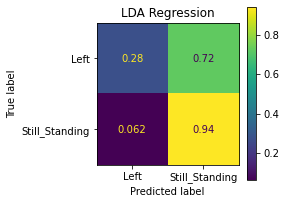

In [399]:
# Визуализируем

from sklearn.metrics import ConfusionMatrixDisplay
fig = plt.figure(figsize=(7,7))

ax = fig.add_subplot(221)
ConfusionMatrixDisplay(lda_cm, display_labels=['Left','Still_Standing']).plot(ax=ax)
plt.title('LDA Regression')

По ConfusionMatrix видим что по ключевому для нас параметру - правильно предсказать уволившегося сотрудника:   
модель **говорит правду в 28%**  и **72% ошибается**.  

In [329]:
# проведем Логистическую регрессию
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(random_state = 30, solver = 'saga', max_iter=100000, warm_start = True, n_jobs = -1)
lr.fit(X_train, y_train )
lr_y_pred = lr.predict(X_test)
accuracy_score(y_test, lr_y_pred)

0.7673333333333333

Логистическая регрессия - дает результат **76.7%** так ли это, построим confusion_matrix

In [347]:
# построим confusion_matrix
from sklearn.metrics import confusion_matrix

lr_cm = confusion_matrix(y_test, lr_y_pred, labels=[1,0], normalize='true')

Text(0.5, 1.0, 'Logistic Regression')

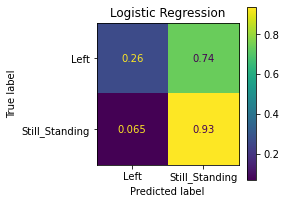

In [348]:
# Визуализируем

from sklearn.metrics import ConfusionMatrixDisplay
fig = plt.figure(figsize=(7,7))

ax = fig.add_subplot(221)
ConfusionMatrixDisplay(lr_cm, display_labels=['Left','Still_Standing']).plot(ax=ax)
plt.title('Logistic Regression')

По ConfusionMatrix видим что по ключевому для нас параметру - правильно предсказать уволившегося сотрудника:   
модель **говорит правду в 26%**  и **74% ошибается**.

In [401]:
from sklearn.model_selection import GridSearchCV

changable_val = {'l1_ratio': [0, 0.1, 0.2, 0.3, 0.5,0.7,0.9,1]}

lr_2 = GridSearchCV(LogisticRegression(penalty='elasticnet',solver='saga',tol=0.0001, max_iter=1000), 
                    changable_val, scoring = 'accuracy', cv = 10, n_jobs = -1 )
lr_2.fit(X,y)

!telegram-send 'Я_посчитал'
lr_2.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


{'l1_ratio': 0}

In [402]:
lr_2.best_score_

0.7646462085835001

Grid Search логистической регрессии тоже выдал результат **76.4%** , построим confusion_matrix

Text(0.5, 1.0, 'Logistic Regression_GridSearch')

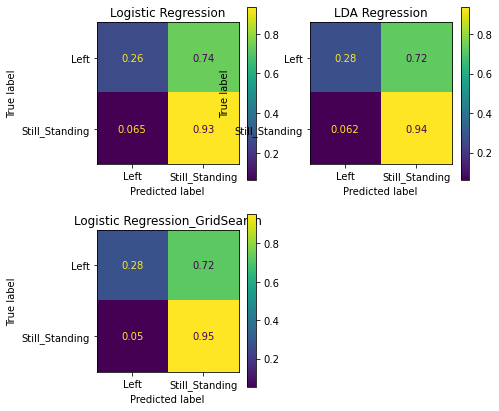

In [406]:
# Confusion Matrix

lr2_y_pred = lr_2.predict(X_test)

lr2_cm = confusion_matrix(y_test, lr2_y_pred,labels=[1,0], normalize='true')

fig = plt.figure(figsize=(7,7))

ax = fig.add_subplot(221)
ConfusionMatrixDisplay(lr_cm, display_labels=['Left','Still_Standing']).plot(ax=ax)
plt.title('Logistic Regression')

ax = fig.add_subplot(222)
ConfusionMatrixDisplay(lda_cm, display_labels=['Left','Still_Standing']).plot(ax=ax)
plt.title('LDA Regression')

ax = fig.add_subplot(223)
ConfusionMatrixDisplay(lr2_cm,display_labels=['Left','Still_Standing']).plot(ax = ax)
plt.title('Logistic Regression_GridSearch')

По ConfusionMatrix видим что по ключевому для нас параметру - правильно предсказать уволившегося сотрудника:   
- LR модель **говорит правду в 26%**  и **74% ошибается**,
- LR_gridSearch модель **говорит правду в 28%**  и **72% ошибается**,
- LDA модель **говорит правду в 28%**  и **72% ошибается**.

In [407]:
del features, X, y, lr_cm, lr2_cm,lda_cm , X_test, X_train, y_test, y_train  #be RAM-friendly